![example](images/director_shot.jpeg)

# Maximizing Home Value: Data-Insights on the Impact of Renovations in King County

**Authors:** Keziah Gicheha.
***

## Overview

This project aims to provide actionable insights for a real estate agency on how home renovations can increase the estimated value of homes in King County. The business problem addressed is the need to advise homeowners on the most impactful renovations to maximize their property's value. Using the King County House Sales dataset, which includes features such as bedrooms, bathrooms, living area square footage, and more, we employ multiple linear regression and other statistical methods to analyze the relationship between these features and home prices. Our results indicate that certain renovations, particularly those increasing living area and upgrading amenities, significantly boost home value. Based on these findings, we recommend prioritizing specific types of renovations to achieve the highest return on investment for homeowners.

## Business Problem

The primary business problem is the need for a real estate agency to provide data-driven advice to homeowners on how home renovations can enhance the value of their properties. Homeowners often invest in renovations without clear guidance on which improvements will yield the highest return on investment. By addressing this pain point, the agency can offer more valuable services to clients, enhancing customer satisfaction and potentially increasing the agency's market share.

***

* Which home features impact sale price the most?
* How does the addition of square footage affect home value?
* What is the Effect of Upgrading Bathrooms and Kitchens on Home Value?
* How Do Renovation Year and Home Age Affect Sale Price?
* What is the Impact of Location Factors (e.g., Zip Code) on Home Value?
***

## Data Understanding

The data for this project is derived from the King County House Sales dataset. This dataset includes comprehensive information on house sales in King County, that also encompasses the city of Seattle and sorrounding area. The data provides insights into various aspects of house sales such as property features and sale prices.
***

* The data represents house sales transactions in King County. Each row corresponds to a unique house sale, and the columns provide details on various attributes of the properties sold. The sample consists of multiple house sales entries, each including the following variables: id, date, price, bedrooms, bathrooms, sqrt_living, sqft_loft, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot14

* The target variable is is price, which represents the sale price of the house.

* Numerical Variables: Variables like price, sqft_living, sqft_lot, bedrooms, bathrooms, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, and sqft_lot15 are numerical and can be analyzed using various statistical and machine learning techniques.
* Categorical Variables: Variables like floors, waterfront, view, condition, and grade are categorical. These variables may need to be encoded appropriately for certain types of analysis.
* Geographical Variables: zipcode, lat, and long provide location-specific data, which can be used to analyze geographical trends in house sales.
* Temporal Variable: The date variable indicates when the transaction occurred and can be used to assess trends over time.
***

In [86]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels as sm



In [54]:
#load the dataset
data = pd.read_csv('kc_house_data.csv')


In [55]:
#check the first few rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [56]:
#get an overview of the dataset 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [57]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [64]:
# Here you run your code to clean the data from the information we have, I decided to drop the following features.
#date, view, sqft_above, sqft_basement, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15

#dropping columns/features 
columns_to_drop = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
data.drop(columns=columns_to_drop, inplace=True)


In [65]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [66]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [70]:
#check for missing values in percentage form
data.isna().sum() / len(data) * 100

id              0.000000
price           0.000000
bedrooms        0.000000
bathrooms       0.000000
sqft_living     0.000000
sqft_lot        0.000000
floors          0.000000
waterfront     11.001528
condition       0.000000
grade           0.000000
yr_built        0.000000
dtype: float64

In [80]:
#all features except waterfront varaible have no missing variables. Waterfall variable has a 11% missing variables. 
#used mode to impute the missing values
mode_value = data['waterfront'].mode()[0]
data['waterfront'].fillna(mode_value, inplace= True)

data.isna().sum() 




id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

R-squared: 0.6304186039722548
RMSE: 219375.2825407905
MAE: 143443.38944554343


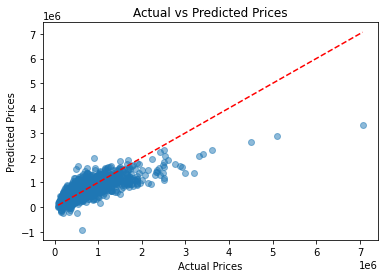

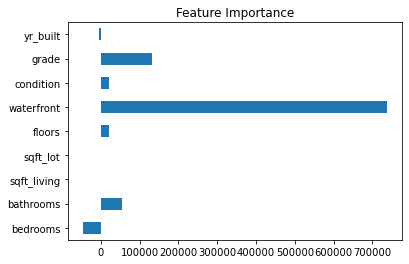

In [89]:
#select features
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade','yr_built']

X = data[selected_features]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f'R-squared: {r2_score(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

# Visualize results

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of best fit
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()




# Analyze feature importance
feature_importance = pd.Series(model.coef_, index=selected_features)
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.show()

In [88]:
#model.summary()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***